# Import ploonetide and other libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ploonetide import TidalSimulation
from ploonetide.utils import colorline
from ploonetide.utils.functions import mean2axis, find_moon_fate
from ploonetide.utils.constants import GYEAR, KYEAR, DAY, MSUN, AU

## Create TidalSimulation object for planet-moon system

In [2]:
simulation = TidalSimulation(
    system='planet-moon',
    star_mass=0.8,  # Solar masses
    star_radius=1.0,  # Solar radii
    star_rotperiod=10,  # days
    planet_mass=2,  # Jupiter masses
    planet_radius=1.3,  # Jupiter radii
    planet_orbperiod=20,  # days
    planet_rotperiod=0.6,  # days
    moon_eccentricty=0.0,
    moon_semimaxis=10,  # Roche radii
    planet_size_evolution=False,
    planet_internal_evolution=True,
    planet_core_dissipation=False,
)

       _                        _   _     _      
 _ __ | | ___   ___  _ __   ___| |_(_) __| | ___ 
| '_ \| |/ _ \ / _ \| '_ \ / _ \ __| |/ _` |/ _ \
| |_) | | (_) | (_) | | | |  __/ |_| | (_| |  __/
| .__/|_|\___/ \___/|_| |_|\___|\__|_|\__,_|\___|
|_|                                              


Stellar mass: 0.8 solMass
 Planet orbital period: 20.0 days
 Planetary mass: 2.0 Mjup
 Planetary radius: 1.3 Rjup
 Moon orbital period: 10.0 a_roche (2.6 days)



### Choose the total integration time and time-step

In [4]:
dir(simulation)
simulation.star_radius = 1
simulation.star_luminosity

<Quantity 6.4635707e+25 W>

In [5]:
integration_time = 1 * simulation.stellar_lifespan
timestep = 100 * KYEAR

### Choose the integrator and run the simulation

In [6]:
simulation.set_integration_method('rk4')
simulation.run(integration_time, timestep)

Progress: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 174692/174692 steps | 01:39<00:00


### Get the times and solutions

In [7]:
times, solutions = simulation.history
nms = solutions[:, 0]
ops = solutions[:, 1]
nps = solutions[:, 2]
Tms = solutions[:, 3]
Ems = solutions[:, 4]
if simulation.moon_eccentricty != 0.0:
    ems = solutions[:, 5]

### Plot the solutions using matplotlib and a few helper functions from ploonetide 

Moon migrates too slow and never escapes or crosses Roche radius.
[10.         10.01364376 10.02697889 ...  9.58129505  9.58128854
  9.58128201]


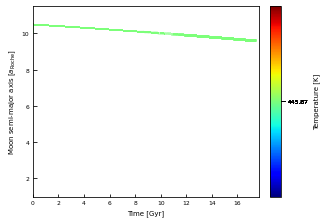

In [9]:
# COMPUTE SEMIMAJOR AXIS
ams = mean2axis(nms, simulation.planet_mass, simulation.moon_mass)
aps = mean2axis(nps, simulation.star_mass.to('kg').value, simulation.planet_mass)

# ************************************************************
# FINDING ROUND-TRIP TIMES OR RUNAWAY TIMES
# ************************************************************
fate = find_moon_fate(times, ams, simulation.moon_roche_radius, simulation.planet_orbperiod,
                      simulation.planet_mass, simulation.star_mass.to('kg').value)

labels = {'P': r'$\mathrm{Log_{10}}(P_\mathrm{orb})\mathrm{[d]}$',
          'Ms': r'$M_\bigstar[\mathrm{M_\odot}]$', 'Mp': r'$M_\mathrm{p}[\mathrm{M_{jup}}]$',
          't': r'$\mathrm{Log_{10}}(\mathrm{Time})\mathrm{[Gyr]}$'}

labelsize = 7.
markersize = 7.
ticksize = 6.

x = times / GYEAR
y = ams / simulation.moon_roche_radius
z = Tms

print(y)


fig = plt.figure(figsize=(5, 3.5))
ax = fig.add_subplot(1, 1, 1)
lc = colorline(x, y, z, cmap='jet')
cbar = fig.colorbar(lc, orientation='vertical', aspect=17, format="%.2f", pad=0.04)
cbar.set_label(label='Temperature [K]', size=7)
cbar.set_ticks(np.linspace(np.nanmin(z), np.nanmax(z), 9))
cbar.ax.tick_params(labelsize=ticksize)
# ax.axhline(am_roche / roche_lims, c="k", ls="--", lw=0.9, zorder=0.0, label="Roche limit")

ax.set_xlim(x.min(), x[fate.index] + 0.2)
ax.set_ylim(1.0, np.nanmax(y[np.isfinite(y)]) + 1)
ax.tick_params(axis='both', direction='in', labelsize=ticksize)

ax.set_xlabel('Time [Gyr]', fontsize=labelsize)
ax.set_ylabel(r'Moon semi-major axis [$a_\mathrm{Roche}$]', fontsize=labelsize)
# ax.legend(loc='upper right', fontsize=labelsize)
fig.savefig('migration.png', dpi=300, facecolor='w')


In [ ]:
simulation.star_luminosity.to('Lsun')